# GLI OUTLIERS

Gli outlier sono valori anomali che si distaccano notevolmente dalla normale distribuzione dei dati. Questi valori "fuori scala" possono influenzare drasticamente le previsioni di un modello statistico e vengono gestiti poichè influenzano le previsioni, che un modello può svolgere, in maniera drastica.

In [14]:
#Importiamo sia la libreria pandas e sia quella matplotlib.pyplot poi rinominandole
import pandas as pd 
import matplotlib.pyplot as plt 

# Crea un DataFrame di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}  # Definisce un dizionario con una lista di valori
df = pd.DataFrame(data)  # Crea un DataFrame usando il dizionario 'data'

# Calcola la media e la deviazione standard
mean_value = df['Valori'].mean()  # Calcola la media dei valori presenti nella colonna 'Valori' del DataFrame 'df'
std_dev = df['Valori'].std()  # Calcola la deviazione standard dei valori presenti nella colonna 'Valori' del DataFrame 'df'
std_dev  # Visualizza la deviazione standard calcolata

30786384.39895254

Il valore molto grande che viene tirato fuori è il risultato della deviazione standard calcolata per la colonna 'Valori' del DataFrame 'df'. In questo caso, il valore ottenuto è molto grande a causa della presenza di outlier nella serie di dati

La deviazione standart è la sommatoria di ciascuno dei valori meno la media dei valori elevato alla seconda più i valori sono distanti dalla media più cresce.

In [15]:
outliers = df[(df['Valori']> mean_value +3 * std_dev) |(df['Valori']< mean_value - 3 * std_dev)]

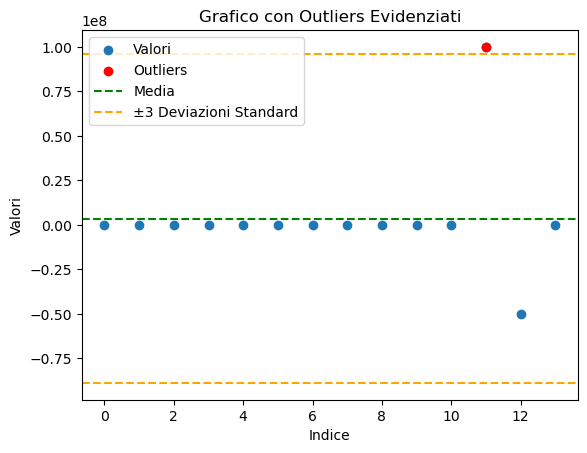

In [16]:
# Crea un grafico a dispersione
plt.scatter(df.index, df['Valori'], label='Valori')

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()

La deviazione standart è una misura di dispersione statistica che indica quanto i dati in un insieme sono distribuiti intorno alla media

I dataframe non hanno sempre solo una colonna. Le "features" (o caratteristiche) delle colonne di un DataFrame 
sono le variabili o gli attributi che rappresentano le informazioni contenute in ciascuna colonna.

min_features_threshold = 1 minimo delle features fuori soglia, quante colonne mi servono per definire outlier quella riga
quindi fuori soglia quella riga è outliers
k=3 significa intervallo di confidenza, viene chiamato k per modificarlo a piacere
creo una lista vuota che alla fine dell'operazione dovra contenere gli indici degli outlier, delle righe che posso considerare outlier
df.columns -> esce il nome delle colonne quindi
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std() 
per ogni colonna prendi il suo nome fai mean value 
.std calcola la deviazione standart 

il true corrisponde al feature 4

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Crea un DataFrame di esempio con 4 features
data = {'Feature1': [1, 200, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 500, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -200000, 3, 4000000000, 5, 10, 15, 20, 200, 30, 10000]}

df = pd.DataFrame(data)

# Definisci il numero minimo di features che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k=3 #intervallo di confidenza 

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Itera su ogni feature
for feature in df.columns:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()    
    # Identifica gli outliers per ciascuna feature
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)
df

Feature1  Feature2  Feature3    Feature4  Outlier_Feature1  \
0           1         2         5           1             False   
1         200         4        10     -200000             False   
2           3         6        15           3             False   
3           4         8     20000  4000000000             False   
4       50000        10        25           5             False   
5          10        20        50          10             False   
6          15        30        75          15             False   
7          20        40       100          20             False   
8     2500000       500       125         200             False   
9   300000000        60       150          30             False   
10  100000000       200    500000       10000             False   

    Outlier_Feature2  Outlier_Feature3  Outlier_Feature4  
0              False             False             False  
1              False             False             False  
2              False             False             False  
3              False             False              True  
4              False             False             False  
5              False             False             False  
6              False             False             False  
7              False             False             False  
8              False             False             False  
9              False             False             False  
10             False              True             False

Ottengo con questo il numero di true che ho per ogni riga (il codice sotto) perchè avevo stabilito un criterio ovvero quante colonne avevano gli outliers.

Il codice serve per identificare e contare gli outliers per ogni record nel DataFrame df, quindi aggiunge questa informazione come una nuova colonna chiamata 'Num_Outliers'.

In [18]:
outliers = df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)
df

Feature1  Feature2  Feature3    Feature4  Outlier_Feature1  \
0           1         2         5           1             False   
1         200         4        10     -200000             False   
2           3         6        15           3             False   
3           4         8     20000  4000000000             False   
4       50000        10        25           5             False   
5          10        20        50          10             False   
6          15        30        75          15             False   
7          20        40       100          20             False   
8     2500000       500       125         200             False   
9   300000000        60       150          30             False   
10  100000000       200    500000       10000             False   

    Outlier_Feature2  Outlier_Feature3  Outlier_Feature4  Num_Outliers  
0              False             False             False             0  
1              False             False             False             0  
2              False             False             False             0  
3              False             False              True             1  
4              False             False             False             0  
5              False             False             False             0  
6              False             False             False             0  
7              False             False             False             0  
8              False             False             False             0  
9              False             False             False             0  
10             False              True             False             1

 Il codice sotto (prendendo sempre i valori di quello precedente) ha lo scopo di gestire e pulire il DataFrame dopo aver identificato gli outliers. L'obiettivo finale è di mantenere solo la colonna 'Is_Outlier' per identificare gli outliers e rimuovere qualsiasi altra colonna ausiliaria non più utile.

In [19]:
# Aggiungi una colonna che indica se il record è un outlier o meno
df['Is_Outlier'] = df.index.isin(outliers.index)
# Rimuovi colonne ausiliarie
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)
df.drop('Num_Outliers', axis=1, inplace=True)
df

Feature1  Feature2  Feature3    Feature4  Is_Outlier
0           1         2         5           1        True
1         200         4        10     -200000        True
2           3         6        15           3        True
3           4         8     20000  4000000000        True
4       50000        10        25           5        True
5          10        20        50          10        True
6          15        30        75          15        True
7          20        40       100          20        True
8     2500000       500       125         200        True
9   300000000        60       150          30        True
10  100000000       200    500000       10000        True

Crea un nuovo DataFrame chiamato df_filtered che contiene solo i record del DataFrame originale df dove il valore nella colonna 'Is_Outlier' è False. In altre parole, vengono selezionati solo i record che non sono considerati outliers secondo il criterio definito in precedenza.

In [20]:
df_filtered = df[df['Is_Outlier'] == False ]
df_filtered

Empty DataFrame
Columns: [Feature1, Feature2, Feature3, Feature4, Is_Outlier]
Index: []

Questo codice organizza i grafici delle feature in una matrice con una colonna e un numero di righe corrispondente al numero di feature nel DataFrame. Le "feature" nei codici sono attributi o variabili che rappresentano specifiche caratteristiche dei dati o del sistema. 

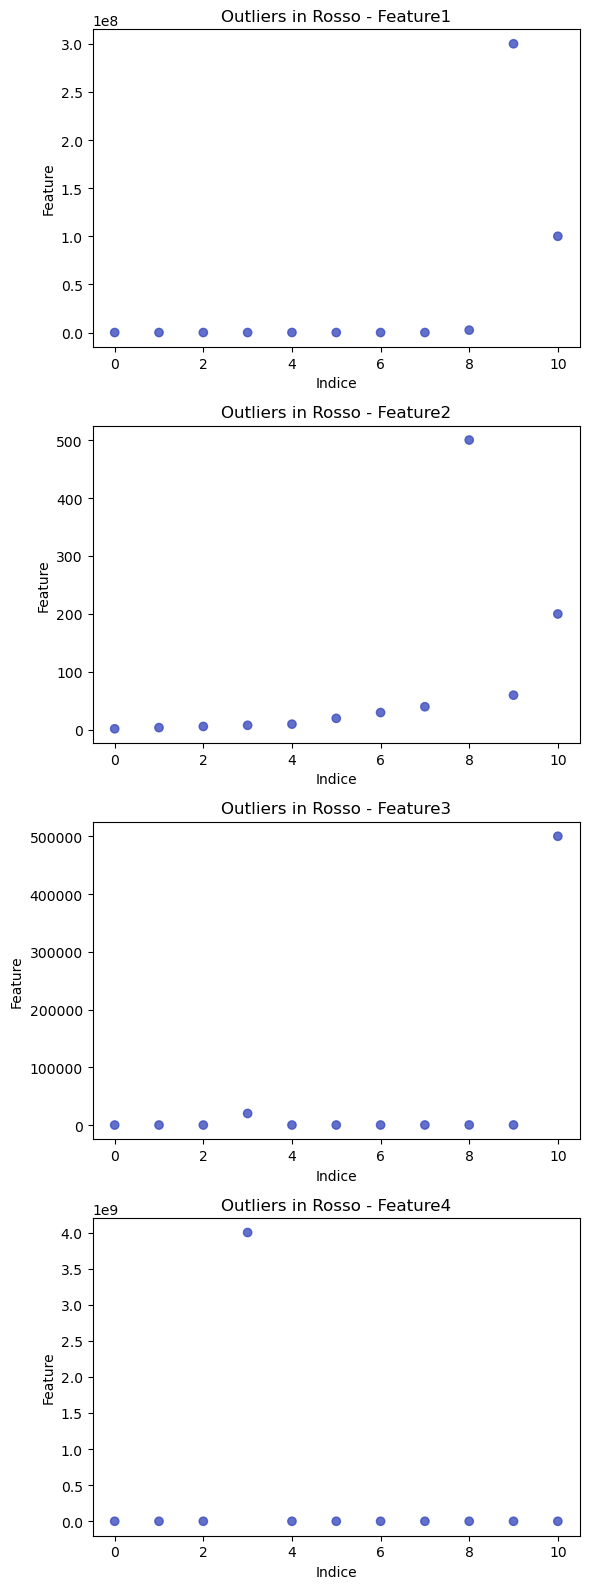

In [22]:
# Organizza i grafici in una matrice, con una colonna e 4 righe
num_features = len(df.columns) - 1  # Escludi la colonna 'Is_Outlier'
num_rows = num_features  # Numero di righe sarà uguale al numero di features
num_cols = 1  # Una colonna

# Imposta la dimensione della figura in base al numero di righe
plt.figure(figsize=(6, 4 * num_rows))

# Itera su ogni feature, creando un subplot per ciascuna
for i, feature in enumerate(df.columns[:-1]):  # Escludi la colonna 'Is_Outlier'
    plt.subplot(num_rows, num_cols, i + 1)  # Crea un subplot nella matrice di grafici
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)  # Crea il grafico a dispersione
    plt.title(f'Outliers in Rosso - {feature}')  # Aggiungi un titolo al subplot
    plt.xlabel('Indice')  # Aggiungi etichetta all'asse x
    plt.ylabel('Feature')  # Aggiungi etichetta all'asse y

# Regola lo spaziatura tra i subplot per evitare sovrapposizioni
plt.tight_layout()

# Mostra il plot
plt.show()


Infine in questo codice viene definita una funzione calcola_deviazione_standard() che sarebbe una misura di dispersione che indica quanto i dati tendono a discostarsi dalla media, che accetta una lista di numeri come input e restituisce la deviazione standard di quella lista

In [21]:
def calcola_deviazione_standard(lista):
    # Calcola la lunghezza della lista
    n = len(lista)
    
    #formula deviazione standart = σ = √(Σ(xi - x̄)² / n)
    
    # Calcola la media della lista
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze tra ciascun elemento della lista e la media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard come la radice quadrata della somma dei quadrati delle differenze divisa per la lunghezza della lista
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    # Restituisce il valore della deviazione standard calcolata
    return deviazione_standard

# Esempio di utilizzo
numero_lista = [1, 2, 3, 4, 50]  # Lista di numeri di esempio #sigma
deviazione_standard = calcola_deviazione_standard(numero_lista)  # Calcola la deviazione standard della lista di numeri

# Stampa il risultato
print(f"La deviazione standard della lista è: {deviazione_standard}")


La deviazione standard della lista è: 19.026297590440446
